# Audio enginering  basics

In [ ]:
from pydub import AudioSegment

In [4]:
Audio=AudioSegment.from_file("mixtape/song1.mp3")

In [ ]:
print("Duration (ms) : ",len(Audio))
print("Channels: ",Audio.channels)
print("Frame Rate : ",Audio.frame_rate)
print("Sample width (byte): ",Audio.sample_width)
print("dBFS (avrage loudness): ",Audio.dBFS)


Duration (ms) :  262661
Channels:  2
Frame Rate :  44100
Sample width (byte):  2
dBFS (avrage loudness):  -12.234179886763584


# slicing audio (show output sizes)

In [5]:
first_5_sec=Audio[:5000]
next_5_sec=Audio[5000:10000]

print("Firsr 5 sec duration: ",len(first_5_sec))
print("Next 5 sec duration : ",len(next_5_sec))



Firsr 5 sec duration:  5000
Next 5 sec duration :  5000


# Fade in /Fade out Demo

In [6]:
fade_in_clip=Audio[:5000].fade_in(3000)
fade_out_clip=Audio[:5000].fade_out(3000)
print("fade-in clip: ",fade_in_clip)
print("Fade-out clip : ",fade_out_clip)



fade-in clip:  <pydub.audio_segment.AudioSegment object at 0x0000029886BF1970>
Fade-out clip :  <pydub.audio_segment.AudioSegment object at 0x00000298886831D0>


# Concatenation Demo 

In [7]:
combined=first_5_sec + next_5_sec 
print("Combined length : ",len(combined))


Combined length :  10000


# Simple Waveform Plot using librosa + Matplotlib 

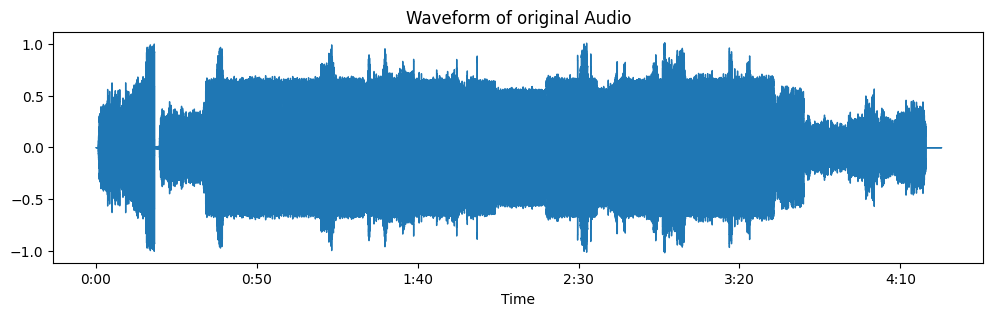

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt 

y,sr =librosa.load("mixtape/song1.mp3",sr=None)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y,sr=sr)
plt.title("Waveform of original Audio")
plt.show()



# Visualize Fade in  vs fade out 

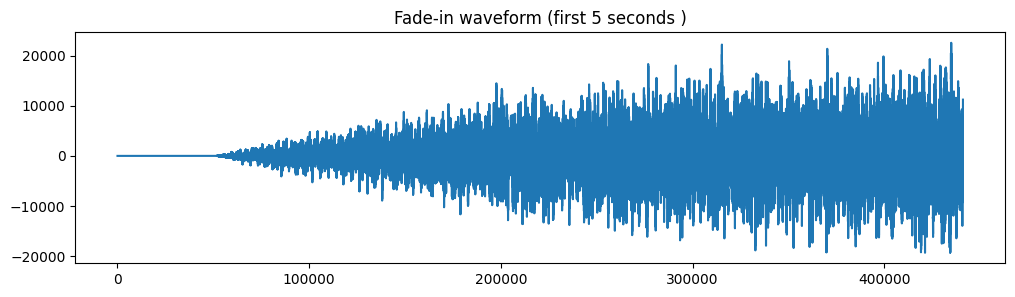

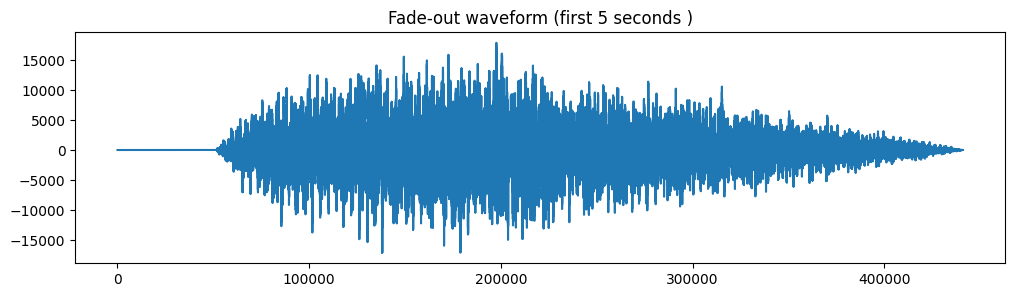

In [10]:
fade_in_audio=fade_in_clip.get_array_of_samples()
fade_out_audio=fade_out_clip.get_array_of_samples()


plt.figure(figsize=(12,3))
plt.plot(fade_in_audio)
plt.title("Fade-in waveform (first 5 seconds )")
plt.show()


plt.figure(figsize=(12,3))
plt.plot(fade_out_audio)
plt.title("Fade-out waveform (first 5 seconds )")
plt.show()



# Logic 

In [13]:
from pydub import AudioSegment
import os,random


In [17]:
def smooth_fade_mixtape(folder,output="output/mixtape.mp3",transition_ms=6000):
    files=[f for f in os.listdir(folder) if f.endswith(("mp3",".wav"))]
    random.shuffle(files)


    mixtape=None
    for i,file in enumerate(files):
        song=AudioSegment.from_file(os.path.join(folder,file))
        song=song.set_channels(2).set_frame_rate(44100)

        if mixtape is None:
            mixtape=song

        else:
            #define overlap region
            overlap=min(transition_ms,len(song),len(mixtape))
            # outgoing: fade out + high -pass to remove bass 

            outgoing=mixtape[-overlap:].fade_out(overlap).low_pass_filter(4000)

            # incoming : fade in + low-pass to smooth highs 

            incoming=song[:overlap].fade_in(overlap).low_pass_filter(4000)

            # overlay transition 

            transition=outgoing.overlay(incoming)

            mixtape=mixtape[:-overlap]+ transition + song[overlap:]


    mixtape.export(output,format="mp3")
    print(f" ✅ Smooth fade mixtape generated : {output}")





smooth_fade_mixtape("mixtape")




    

 ✅ Smooth fade mixtape generated : output/mixtape.mp3


In [ ]:
import os
from pydub import AudioSegment
from mutagen.mp3 import MP3
from datetime import timedelta


def format_time(seconds):
    """Convert seconds to mm:ss or hh:mm:ss"""
    return str(timedelta(seconds=int(seconds)))


def generate_youtube_description(
    folder,
    dj_name="DJ Mix",
    mix_title="Non Stop Party Mixtape",
    genre="Bollywood / EDM / DJ"
):
    files = [f for f in os.listdir(folder) if f.endswith(("mp3", ".wav"))]
    files.sort()  # keep order same as mixtape if needed

    description = []
    timestamps = []
    total_seconds = 0

    description.append(f"🎧 **{mix_title}**")
    description.append(f"🔥 Mixed by **{dj_name}**")
    description.append(f"🎶 Genre: {genre}")
    description.append("")
    description.append("📌 **Tracklist / Timestamps:**")
    description.append("")

    for file in files:
        path = os.path.join(folder, file)

        # get duration
        if file.endswith(".mp3"):
            audio = MP3(path)
            duration = audio.info.length
        else:
            audio = AudioSegment.from_file(path)
            duration = len(audio) / 1000

        song_name = os.path.splitext(file)[0]
        time_tag = format_time(total_seconds)

        timestamps.append(f"{time_tag} - {song_name}")

        total_seconds += duration

    description.extend(timestamps)

    description.append("")
    description.append("⚡ **If you enjoy the mix:**")
    description.append("👍 Like | 🔁 Share | 🔔 Subscribe")
    description.append("")
    description.append("📢 **Hashtags:**")
    description.append(
        "#DJMix #NonStopDJ #PartyMix #EDMMix #BollywoodDJ "
        "#ClubMix #DJRemix #Music2026 #DanceMix #BassBoosted"
    )

    final_description = "\n".join(description)
    return final_description


# ===== RUN =====
desc = generate_youtube_description(
    folder="mixtape",
    dj_name="DJ Nikhil",
    mix_title="Non Stop Party DJ Mixtape 2026",
    genre="Bollywood x EDM"
)

print("\n" + "="*50)
print(desc)
print("="*50)


# Video generater 

In [22]:
import subprocess
import os 
from PIL import Image




In [23]:
def make_video_from_audio_optimized(image_path,audio_path,output_path="output/mixtape_vid3.mp4",video_resolution=(1280,720),fps=1,preset="ultrafast"):

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found : {image_path}")
    
    if not os.path.exists(audio_path):
        raise FileNotFoundError(f"Audio not found : {audio_path}")
    

    # Ensure output folder exists
    os.makedirs(os.path.dirname(output_path),exist_ok=True)


    # Resize image  if necessary 

    img_resized_path="temp_resized_image.jpg"
    img=Image.open(image_path)
    img=img.resize(video_resolution)
    img.save(img_resized_path)


    # ffmpeg command

    cmd=[
        "ffmpeg" ,                      # invoke ffmeg program
        "-y",                           # overwrite output file without asking 
        "-loop","1",                    #loop the input image (so it says on screen )
        "-i",img_resized_path,          # input:#1: the static image
        "-i",audio_path,                # input:#2 : the audio track (mp3/wav/etc.)
        "-c:v","libx264",               # encode video using H.264 codec 
        "-preset",preset,               # encoding speed/quality preset (e.g 'fast','medium')
        "-tune","stillimage",           # optimize encoding for a static image 
        "-r",str(fps) ,                 # set frames per second (low=smaller file)
        "-c:a","aac"  ,                  # encode audio using aac codec
        "-b:a","192k",                  # set audio bitrate to 192kbps 
        "-shortest",                    # stop encoding when the shortest input ends (audio ends)  
        output_path                     # output file path (e.g .mp4)


    ]

    try:
        subprocess.run(cmd,check=True)
        print(f" video created : {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"FFmeg failed! Error: ",e)
    finally:
        # clean up temporary  resized image
        if os.path.exists(img_resized_path):
            os.remove(img_resized_path)


# Example usage

image_path=r"images/dj-image.jpg"
audio_path=r"output/mixtape.mp3"

make_video_from_audio_optimized(image_path,audio_path)





 video created : output/mixtape_vid3.mp4
